## Exercise 2.4

In [2]:
# setup environment
import nsfg
import thinkstats2
import thinkplot
import numpy as np
import math

In [4]:
# cleaning data
preg = nsfg.ReadFemPreg()
def CleanFemPreg(df):
    df.agepreg /= 100.0
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0
CleanFemPreg(preg)

In [5]:
# slicing the data   
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

firsts_totalwgt_lb = firsts.totalwgt_lb
others_totalwgt_lb = others.totalwgt_lb

In [10]:
# Cohen's D
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [7]:
CohenEffectSize(firsts_totalwgt_lb, others_totalwgt_lb)

-0.088672927072601701

In [9]:
raw_differences = firsts_totalwgt_lb.mean() - others_totalwgt_lb.mean()
raw_differences

-0.12476118453549034

# Exercise 3.1

In [11]:
# getting the data
def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    return df

In [12]:
resp = ReadFemResp()
resp['numkdhh'].head()

0    3
1    0
2    0
3    0
4    0
Name: numkdhh, dtype: int64

In [13]:
# observed pmf
pmf = thinkstats2.Pmf((resp.numkdhh), label = 'observed')

In [14]:
# calculating biased pmf
def BiasPmf(pmf, label):
	new_pmf = pmf.Copy(label = label)
	for x, p in pmf.Items():
		new_pmf.Mult(x, x)
	new_pmf.Normalize()
	return new_pmf
biased_pmf = BiasPmf(pmf, label = 'biased')

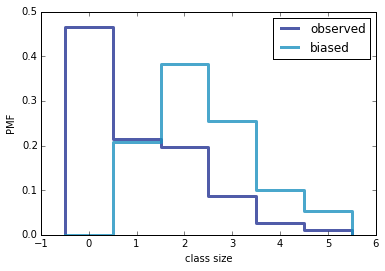

In [16]:
# plotting
%matplotlib inline
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel = 'class size', ylabel = 'PMF')

In [17]:
# difference in means
pmf.Mean()
biased_pmf.Mean()

2.4036791006642821

In [18]:
def CohenEffectSize(group1, group2):
    diff = group1.Mean() - group2.Mean()
    var1 = group1.Var()
    var2 = group2.Var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [20]:
CohenEffectSize(pmf, biased_pmf)

-1.2131172658578586